In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from autoplan.trainer import ClassifierTrainer
from autoplan.dataset import PrelabeledDataset
from autoplan.vis import plot_accuracy, plot_cm

from tqdm import tqdm_notebook as tqdm
import pandas as pd
import torch
import os

device = torch.device('cuda:0')
REPO_DIR = os.path.expanduser('~/autoplan')

In [69]:
dataset_name = 'T1'
dataset = PrelabeledDataset.load(f'{REPO_DIR}/data/rainfall/{dataset_name}.pkl')

In [107]:
trainer = ClassifierTrainer(dataset, device=device, val_frac=0.3, model_opts={'embedding_size': 32, 'hidden_size': 64})
losses = []
train_eval = []
val_eval = []

In [108]:
for _ in tqdm(range(100)):
    losses.append(trainer.train_one_epoch())
    train, val = trainer.eval()
    train_eval.append(train)
    val_eval.append(val)

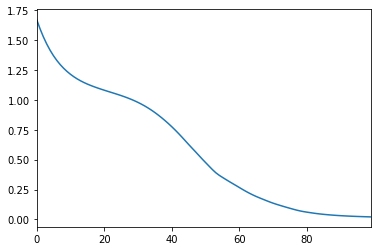

In [109]:
pd.Series(losses).plot()

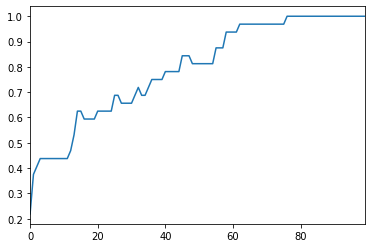

In [110]:
plot_accuracy(train_eval)

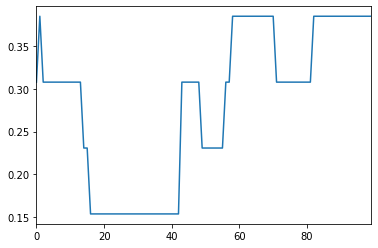

In [111]:
plot_accuracy(val_eval)

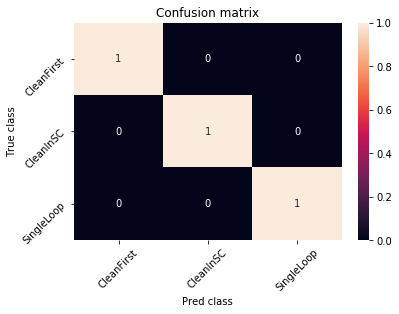

In [113]:
train_eval[-1].plot_cm()

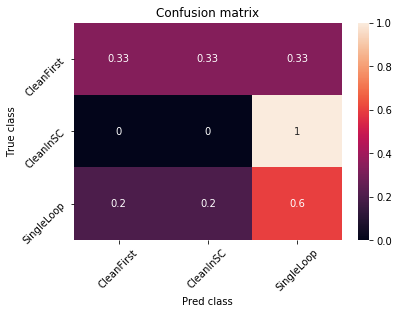

In [112]:
val_eval[-1].plot_cm()